In [1]:
%matplotlib notebook

from sdss import SDSS
import mikkel_tools.utility as mt_util

import numpy as np
from math import inf
from scipy.optimize import curve_fit
import scipy as sp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import time
import pyshtools
import pickle

comment = "Synthetic core with tapered ensemble as prior checking variance lookup"
nb_name = "nb_case_core_synthetic_checkvar"

In [2]:
shc_g = 30
shc_grid = 30

core = SDSS(comment, N_SH = shc_g, sim_type = "core_ens", sat_height = 350)

core.grid_glq(nmax = shc_grid, r_at = core.r_cmb)

grid_in = np.array([core.grid_phi, 90-core.grid_theta]).T
core.make_grid(core.r_cmb, grid_in, calc_sph_d = False)
core.generate_map()

core.condtab(normsize=10000, quantiles = 1000, 
             rangn_lim = 3.5, rangn_N = 1001, rangv_lim = 2.0, rangv_N = 501, model_hist = "ensemble") #model_hist = "ensemble"

# Covariance model

All eigenvalues > 0: True
Cov model is pos def: True


<IPython.core.display.Javascript object>


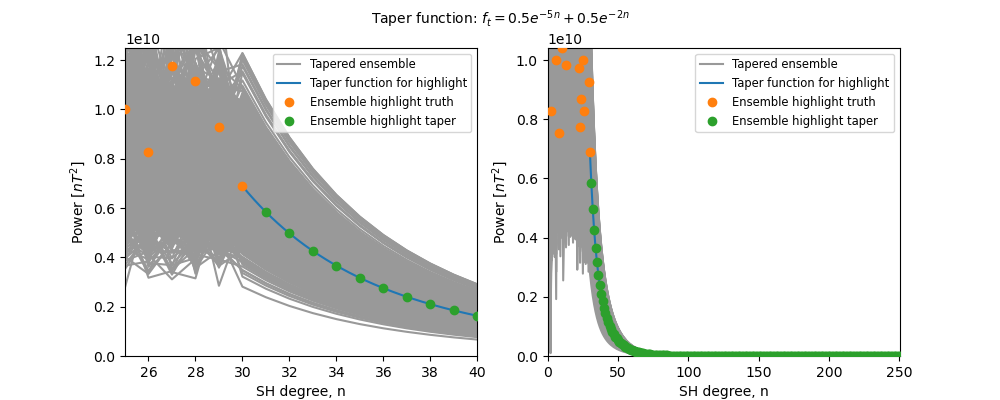

In [3]:
core.cov_model_taper(r_at = core.r_cmb, tap_to = 500, tap_exp_p1 = 5, tap_exp_p2 = 2,
                     tap_scale_start = 0, tap_scale_end = 24, plot_taper = True,
                     save_fig = False, save_string = "case_core_synthetic", save_dpi = 300)

# Synthetic sat

In [4]:
C_e_const = 2.0

s_sat = SDSS(comment, N_SH = shc_g, sim_type = "core", sat_height = 350, N_SH_secondary = None)

s_sat.load_swarm("A")

grid_in = np.array([s_sat.grid_phi, 90-s_sat.grid_theta]).T
s_sat.make_grid(s_sat.grid_radial, grid_in, calc_sph_d = False)

s_sat.generate_map(grid_type = "swarm")

s_sat.data += np.random.normal(scale = C_e_const, size = s_sat.data.shape)

# Source truth

In [5]:
s_source = SDSS(comment, N_SH = shc_g, sim_type = "core", sat_height = 350, N_SH_secondary = None)

s_source.grid_glq(nmax = shc_grid, r_at = core.r_cmb)

grid_in = np.array([s_source.grid_phi, 90-s_source.grid_theta]).T
s_source.make_grid(s_source.r_cmb, grid_in, calc_sph_d = False)

s_source.generate_map()

# System equations

In [6]:
core.integrating_kernel(s_sat, C_e_const = C_e_const, C_mm_supply = core.C_ens_tap)

# SDSSIM

In [7]:
N_sim = 10
core.target_var = np.max(core.C_ens_tap)

core.run_sim(N_sim, core.grid_N, core.C_mm_all, core.C_dd, core.C_dm_all, core.G,
        s_sat.data, core.data, scale_m_i = True, unit_d = False, collect_all = True,
        sense_running_error = True, save_string = nb_name, sim_stochastic = False, solve_cho = True)

76
 |----------| 0.1%   realization nr. 0. Counter: 1/1891, Running error magnitude: 5.959
 |----------| 0.1%   realization nr. 0. Counter: 2/1891, Running error magnitude: 5.956
 |----------| 0.2%   realization nr. 0. Counter: 3/1891, Running error magnitude: 5.478
 |----------| 0.2%   realization nr. 0. Counter: 4/1891, Running error magnitude: 5.259
 |----------| 0.3%   realization nr. 0. Counter: 6/1891, Running error magnitude: 5.160
 |----------| 0.4%   realization nr. 0. Counter: 7/1891, Running error magnitude: 5.262
 |----------| 0.4%   realization nr. 0. Counter: 8/1891, Running error magnitude: 5.262
 |----------| 0.5%   realization nr. 0. Counter: 9/1891, Running error magnitude: 5.261
 |----------| 0.5%   realization nr. 0. Counter: 10/1891, Running error magnitude: 5.361
 |----------| 0.6%   realization nr. 0. Counter: 11/1891, Running error magnitude: 5.261
 |----------| 0.6%   realization nr. 0. Counter: 12/1891, Running error magnitude: 5.262
 |----------| 0.7%   reali

 |----------| 6.2%   realization nr. 0. Counter: 118/1891, Running error magnitude: 5.458
 |----------| 6.3%   realization nr. 0. Counter: 119/1891, Running error magnitude: 5.459
 |----------| 6.3%   realization nr. 0. Counter: 120/1891, Running error magnitude: 5.457
 |----------| 6.4%   realization nr. 0. Counter: 121/1891, Running error magnitude: 5.452
 |----------| 6.5%   realization nr. 0. Counter: 123/1891, Running error magnitude: 5.459
 |----------| 6.6%   realization nr. 0. Counter: 124/1891, Running error magnitude: 5.453
 |----------| 6.6%   realization nr. 0. Counter: 125/1891, Running error magnitude: 5.462
 |----------| 6.7%   realization nr. 0. Counter: 126/1891, Running error magnitude: 5.457
 |----------| 6.7%   realization nr. 0. Counter: 127/1891, Running error magnitude: 5.455
 |----------| 6.8%   realization nr. 0. Counter: 128/1891, Running error magnitude: 5.456
 |----------| 6.8%   realization nr. 0. Counter: 129/1891, Running error magnitude: 5.462
 |--------

 |O---------| 14.4%   realization nr. 0. Counter: 272/1891, Running error magnitude: 5.452
 |O---------| 14.4%   realization nr. 0. Counter: 273/1891, Running error magnitude: 5.458
 |O---------| 14.8%   realization nr. 0. Counter: 279/1891, Running error magnitude: 5.455
 |O---------| 14.9%   realization nr. 0. Counter: 281/1891, Running error magnitude: 5.456
 |O---------| 14.9%   realization nr. 0. Counter: 282/1891, Running error magnitude: 5.456
 |O---------| 15.1%   realization nr. 0. Counter: 286/1891, Running error magnitude: 5.461
 |O---------| 15.2%   realization nr. 0. Counter: 287/1891, Running error magnitude: 5.457
 |O---------| 15.3%   realization nr. 0. Counter: 290/1891, Running error magnitude: 5.455
 |O---------| 15.4%   realization nr. 0. Counter: 291/1891, Running error magnitude: 5.456
 |O---------| 15.5%   realization nr. 0. Counter: 293/1891, Running error magnitude: 5.457
 |O---------| 15.5%   realization nr. 0. Counter: 294/1891, Running error magnitude: 5.461

 |OO--------| 24.6%   realization nr. 0. Counter: 465/1891, Running error magnitude: 5.452
 |OO--------| 24.6%   realization nr. 0. Counter: 466/1891, Running error magnitude: 5.457
 |OO--------| 24.7%   realization nr. 0. Counter: 468/1891, Running error magnitude: 5.458
 |OO--------| 24.9%   realization nr. 0. Counter: 470/1891, Running error magnitude: 5.455
 |OO--------| 24.9%   realization nr. 0. Counter: 471/1891, Running error magnitude: 5.457
 |OO--------| 25.1%   realization nr. 0. Counter: 474/1891, Running error magnitude: 5.455
 |OO--------| 25.1%   realization nr. 0. Counter: 475/1891, Running error magnitude: 5.454
 |OO--------| 25.2%   realization nr. 0. Counter: 477/1891, Running error magnitude: 5.458
 |OO--------| 25.3%   realization nr. 0. Counter: 478/1891, Running error magnitude: 5.459
 |OO--------| 25.5%   realization nr. 0. Counter: 482/1891, Running error magnitude: 5.455
 |OO--------| 25.6%   realization nr. 0. Counter: 485/1891, Running error magnitude: 5.454

 |----------| 0.2%   realization nr. 1. Counter: 4/1891, Running error magnitude: 5.451
 |----------| 0.3%   realization nr. 1. Counter: 5/1891, Running error magnitude: 5.557
 |----------| 0.3%   realization nr. 1. Counter: 6/1891, Running error magnitude: 5.551
 |----------| 0.4%   realization nr. 1. Counter: 7/1891, Running error magnitude: 5.459
 |----------| 0.5%   realization nr. 1. Counter: 9/1891, Running error magnitude: 5.563
 |----------| 0.5%   realization nr. 1. Counter: 10/1891, Running error magnitude: 5.552
 |----------| 0.6%   realization nr. 1. Counter: 12/1891, Running error magnitude: 5.558
 |----------| 0.7%   realization nr. 1. Counter: 13/1891, Running error magnitude: 5.566
 |----------| 0.8%   realization nr. 1. Counter: 15/1891, Running error magnitude: 5.557
 |----------| 0.8%   realization nr. 1. Counter: 16/1891, Running error magnitude: 5.581
 |----------| 0.9%   realization nr. 1. Counter: 17/1891, Running error magnitude: 5.560
 |----------| 1.0%   reali

 |----------| 6.3%   realization nr. 1. Counter: 120/1891, Running error magnitude: 5.562
 |----------| 6.4%   realization nr. 1. Counter: 121/1891, Running error magnitude: 5.562
 |----------| 6.5%   realization nr. 1. Counter: 122/1891, Running error magnitude: 5.557
 |----------| 6.5%   realization nr. 1. Counter: 123/1891, Running error magnitude: 5.558
 |----------| 6.6%   realization nr. 1. Counter: 124/1891, Running error magnitude: 5.560
 |----------| 6.6%   realization nr. 1. Counter: 125/1891, Running error magnitude: 5.559
 |----------| 6.8%   realization nr. 1. Counter: 128/1891, Running error magnitude: 5.554
 |----------| 6.9%   realization nr. 1. Counter: 131/1891, Running error magnitude: 5.551
 |----------| 7.0%   realization nr. 1. Counter: 132/1891, Running error magnitude: 5.559
 |----------| 7.1%   realization nr. 1. Counter: 134/1891, Running error magnitude: 5.567
 |----------| 7.2%   realization nr. 1. Counter: 137/1891, Running error magnitude: 5.561
 |--------

 |O---------| 13.9%   realization nr. 1. Counter: 263/1891, Running error magnitude: 5.557
 |O---------| 14.0%   realization nr. 1. Counter: 264/1891, Running error magnitude: 5.555
 |O---------| 14.1%   realization nr. 1. Counter: 266/1891, Running error magnitude: 5.551
 |O---------| 14.1%   realization nr. 1. Counter: 267/1891, Running error magnitude: 5.557
 |O---------| 14.2%   realization nr. 1. Counter: 268/1891, Running error magnitude: 5.556
 |O---------| 14.3%   realization nr. 1. Counter: 270/1891, Running error magnitude: 5.559
 |O---------| 14.4%   realization nr. 1. Counter: 273/1891, Running error magnitude: 5.558
 |O---------| 14.5%   realization nr. 1. Counter: 274/1891, Running error magnitude: 5.553
 |O---------| 14.6%   realization nr. 1. Counter: 276/1891, Running error magnitude: 5.556
 |O---------| 14.7%   realization nr. 1. Counter: 278/1891, Running error magnitude: 5.560
 |O---------| 14.8%   realization nr. 1. Counter: 279/1891, Running error magnitude: 5.558

 |OO--------| 25.4%   realization nr. 1. Counter: 480/1891, Running error magnitude: 5.551
 |OO--------| 25.6%   realization nr. 1. Counter: 484/1891, Running error magnitude: 5.555
 |OO--------| 26.1%   realization nr. 1. Counter: 493/1891, Running error magnitude: 5.552
 |OO--------| 26.2%   realization nr. 1. Counter: 495/1891, Running error magnitude: 5.555
 |OO--------| 26.3%   realization nr. 1. Counter: 498/1891, Running error magnitude: 5.555
 |OO--------| 26.5%   realization nr. 1. Counter: 501/1891, Running error magnitude: 5.555
 |OO--------| 26.6%   realization nr. 1. Counter: 503/1891, Running error magnitude: 5.558
 |OO--------| 26.7%   realization nr. 1. Counter: 504/1891, Running error magnitude: 5.553
 |OO--------| 26.8%   realization nr. 1. Counter: 506/1891, Running error magnitude: 5.554
 |OO--------| 26.9%   realization nr. 1. Counter: 509/1891, Running error magnitude: 5.556
 |OO--------| 27.1%   realization nr. 1. Counter: 513/1891, Running error magnitude: 5.559

 |----------| 0.6%   realization nr. 2. Counter: 12/1891, Running error magnitude: 5.670
 |----------| 0.7%   realization nr. 2. Counter: 13/1891, Running error magnitude: 5.658
 |----------| 0.7%   realization nr. 2. Counter: 14/1891, Running error magnitude: 5.758
 |----------| 0.8%   realization nr. 2. Counter: 15/1891, Running error magnitude: 5.661
 |----------| 0.8%   realization nr. 2. Counter: 16/1891, Running error magnitude: 5.660
 |----------| 1.0%   realization nr. 2. Counter: 19/1891, Running error magnitude: 5.656
 |----------| 1.1%   realization nr. 2. Counter: 20/1891, Running error magnitude: 5.654
 |----------| 1.1%   realization nr. 2. Counter: 21/1891, Running error magnitude: 5.658
 |----------| 1.2%   realization nr. 2. Counter: 22/1891, Running error magnitude: 5.660
 |----------| 1.2%   realization nr. 2. Counter: 23/1891, Running error magnitude: 5.659
 |----------| 1.3%   realization nr. 2. Counter: 24/1891, Running error magnitude: 5.656
 |----------| 1.3%   

 |----------| 7.4%   realization nr. 2. Counter: 140/1891, Running error magnitude: 5.552
 |----------| 7.5%   realization nr. 2. Counter: 142/1891, Running error magnitude: 5.554
 |----------| 7.7%   realization nr. 2. Counter: 145/1891, Running error magnitude: 5.561
 |----------| 7.9%   realization nr. 2. Counter: 149/1891, Running error magnitude: 5.559
 |----------| 7.9%   realization nr. 2. Counter: 150/1891, Running error magnitude: 5.560
 |----------| 8.0%   realization nr. 2. Counter: 151/1891, Running error magnitude: 5.554
 |----------| 8.1%   realization nr. 2. Counter: 154/1891, Running error magnitude: 5.555
 |----------| 8.2%   realization nr. 2. Counter: 156/1891, Running error magnitude: 5.557
 |----------| 8.4%   realization nr. 2. Counter: 159/1891, Running error magnitude: 5.555
 |----------| 8.5%   realization nr. 2. Counter: 160/1891, Running error magnitude: 5.561
 |----------| 8.5%   realization nr. 2. Counter: 161/1891, Running error magnitude: 5.554
 |--------

 |O---------| 17.6%   realization nr. 2. Counter: 333/1891, Running error magnitude: 5.556
 |O---------| 17.9%   realization nr. 2. Counter: 339/1891, Running error magnitude: 5.559
 |O---------| 18.0%   realization nr. 2. Counter: 340/1891, Running error magnitude: 5.559
 |O---------| 18.0%   realization nr. 2. Counter: 341/1891, Running error magnitude: 5.556
 |O---------| 18.1%   realization nr. 2. Counter: 343/1891, Running error magnitude: 5.551
 |O---------| 18.2%   realization nr. 2. Counter: 344/1891, Running error magnitude: 5.552
 |O---------| 18.2%   realization nr. 2. Counter: 345/1891, Running error magnitude: 5.554
 |O---------| 18.3%   realization nr. 2. Counter: 346/1891, Running error magnitude: 5.552
 |O---------| 18.5%   realization nr. 2. Counter: 349/1891, Running error magnitude: 5.559
 |O---------| 18.5%   realization nr. 2. Counter: 350/1891, Running error magnitude: 5.554
 |O---------| 18.6%   realization nr. 2. Counter: 352/1891, Running error magnitude: 5.559

 |OO--------| 29.8%   realization nr. 2. Counter: 564/1891, Running error magnitude: 5.553
 |OOO-------| 30.1%   realization nr. 2. Counter: 570/1891, Running error magnitude: 5.552
 |OOO-------| 30.4%   realization nr. 2. Counter: 575/1891, Running error magnitude: 5.551
 |OOO-------| 30.6%   realization nr. 2. Counter: 579/1891, Running error magnitude: 5.556
 |OOO-------| 30.8%   realization nr. 2. Counter: 583/1891, Running error magnitude: 5.557
 |OOO-------| 30.9%   realization nr. 2. Counter: 585/1891, Running error magnitude: 5.558
 |OOO-------| 31.0%   realization nr. 2. Counter: 586/1891, Running error magnitude: 5.551
 |OOO-------| 31.3%   realization nr. 2. Counter: 592/1891, Running error magnitude: 5.552
 |OOO-------| 31.4%   realization nr. 2. Counter: 594/1891, Running error magnitude: 5.554
 |OOO-------| 31.6%   realization nr. 2. Counter: 598/1891, Running error magnitude: 5.554
 |OOO-------| 31.9%   realization nr. 2. Counter: 603/1891, Running error magnitude: 5.551

 |----------| 1.3%   realization nr. 3. Counter: 24/1891, Running error magnitude: 5.459
 |----------| 1.3%   realization nr. 3. Counter: 25/1891, Running error magnitude: 5.455
 |----------| 1.4%   realization nr. 3. Counter: 26/1891, Running error magnitude: 5.460
 |----------| 1.4%   realization nr. 3. Counter: 27/1891, Running error magnitude: 5.461
 |----------| 1.5%   realization nr. 3. Counter: 28/1891, Running error magnitude: 5.574
 |----------| 1.6%   realization nr. 3. Counter: 31/1891, Running error magnitude: 5.459
 |----------| 1.7%   realization nr. 3. Counter: 32/1891, Running error magnitude: 5.456
 |----------| 1.7%   realization nr. 3. Counter: 33/1891, Running error magnitude: 5.461
 |----------| 1.9%   realization nr. 3. Counter: 35/1891, Running error magnitude: 5.460
 |----------| 2.0%   realization nr. 3. Counter: 38/1891, Running error magnitude: 5.558
 |----------| 2.1%   realization nr. 3. Counter: 40/1891, Running error magnitude: 5.554
 |----------| 2.2%   

 |----------| 8.4%   realization nr. 3. Counter: 158/1891, Running error magnitude: 5.557
 |----------| 8.4%   realization nr. 3. Counter: 159/1891, Running error magnitude: 5.557
 |----------| 8.5%   realization nr. 3. Counter: 160/1891, Running error magnitude: 5.561
 |----------| 8.6%   realization nr. 3. Counter: 162/1891, Running error magnitude: 5.561
 |----------| 8.8%   realization nr. 3. Counter: 166/1891, Running error magnitude: 5.561
 |----------| 8.8%   realization nr. 3. Counter: 167/1891, Running error magnitude: 5.556
 |----------| 8.9%   realization nr. 3. Counter: 168/1891, Running error magnitude: 5.560
 |----------| 8.9%   realization nr. 3. Counter: 169/1891, Running error magnitude: 5.559
 |----------| 9.1%   realization nr. 3. Counter: 172/1891, Running error magnitude: 5.555
 |----------| 9.2%   realization nr. 3. Counter: 174/1891, Running error magnitude: 5.460
 |----------| 9.3%   realization nr. 3. Counter: 175/1891, Running error magnitude: 5.458
 |--------

 |O---------| 16.7%   realization nr. 3. Counter: 315/1891, Running error magnitude: 5.559
 |O---------| 16.8%   realization nr. 3. Counter: 318/1891, Running error magnitude: 5.557
 |O---------| 17.0%   realization nr. 3. Counter: 322/1891, Running error magnitude: 5.553
 |O---------| 17.2%   realization nr. 3. Counter: 325/1891, Running error magnitude: 5.554
 |O---------| 17.2%   realization nr. 3. Counter: 326/1891, Running error magnitude: 5.560
 |O---------| 17.5%   realization nr. 3. Counter: 330/1891, Running error magnitude: 5.556
 |O---------| 17.5%   realization nr. 3. Counter: 331/1891, Running error magnitude: 5.554
 |O---------| 17.6%   realization nr. 3. Counter: 332/1891, Running error magnitude: 5.558
 |O---------| 17.7%   realization nr. 3. Counter: 334/1891, Running error magnitude: 5.557
 |O---------| 17.8%   realization nr. 3. Counter: 336/1891, Running error magnitude: 5.558
 |O---------| 17.8%   realization nr. 3. Counter: 337/1891, Running error magnitude: 5.561

 |OOO-------| 31.2%   realization nr. 3. Counter: 590/1891, Running error magnitude: 5.553
 |OOO-------| 31.3%   realization nr. 3. Counter: 592/1891, Running error magnitude: 5.555
 |OOO-------| 31.6%   realization nr. 3. Counter: 597/1891, Running error magnitude: 5.556
 |OOO-------| 31.9%   realization nr. 3. Counter: 603/1891, Running error magnitude: 5.558
 |OOO-------| 32.2%   realization nr. 3. Counter: 609/1891, Running error magnitude: 5.558
 |OOO-------| 32.3%   realization nr. 3. Counter: 611/1891, Running error magnitude: 5.551
 |OOO-------| 32.9%   realization nr. 3. Counter: 622/1891, Running error magnitude: 5.551
 |OOO-------| 33.3%   realization nr. 3. Counter: 629/1891, Running error magnitude: 5.551
 |OOO-------| 33.5%   realization nr. 3. Counter: 633/1891, Running error magnitude: 5.553
 |OOO-------| 33.6%   realization nr. 3. Counter: 636/1891, Running error magnitude: 5.551
 |OOO-------| 33.7%   realization nr. 3. Counter: 637/1891, Running error magnitude: 5.553

 |----------| 1.5%   realization nr. 4. Counter: 28/1891, Running error magnitude: 5.658
 |----------| 1.5%   realization nr. 4. Counter: 29/1891, Running error magnitude: 5.659
 |----------| 1.6%   realization nr. 4. Counter: 30/1891, Running error magnitude: 5.573
 |----------| 1.7%   realization nr. 4. Counter: 33/1891, Running error magnitude: 5.562
 |----------| 1.8%   realization nr. 4. Counter: 34/1891, Running error magnitude: 5.562
 |----------| 1.9%   realization nr. 4. Counter: 36/1891, Running error magnitude: 5.661
 |----------| 2.0%   realization nr. 4. Counter: 38/1891, Running error magnitude: 5.555
 |----------| 2.1%   realization nr. 4. Counter: 40/1891, Running error magnitude: 5.559
 |----------| 2.4%   realization nr. 4. Counter: 45/1891, Running error magnitude: 5.461
 |----------| 2.4%   realization nr. 4. Counter: 46/1891, Running error magnitude: 5.552
 |----------| 2.5%   realization nr. 4. Counter: 47/1891, Running error magnitude: 5.553
 |----------| 2.5%   

 |----------| 9.2%   realization nr. 4. Counter: 174/1891, Running error magnitude: 5.456
 |----------| 9.3%   realization nr. 4. Counter: 175/1891, Running error magnitude: 5.454
 |----------| 9.3%   realization nr. 4. Counter: 176/1891, Running error magnitude: 5.456
 |----------| 9.6%   realization nr. 4. Counter: 181/1891, Running error magnitude: 5.458
 |----------| 9.8%   realization nr. 4. Counter: 186/1891, Running error magnitude: 5.456
 |----------| 9.9%   realization nr. 4. Counter: 188/1891, Running error magnitude: 5.457
 |----------| 10.0%   realization nr. 4. Counter: 189/1891, Running error magnitude: 5.452
 |O---------| 10.0%   realization nr. 4. Counter: 190/1891, Running error magnitude: 5.456
 |O---------| 10.1%   realization nr. 4. Counter: 191/1891, Running error magnitude: 5.457
 |O---------| 10.2%   realization nr. 4. Counter: 192/1891, Running error magnitude: 5.460
 |O---------| 10.4%   realization nr. 4. Counter: 196/1891, Running error magnitude: 5.455
 |O--

 |O---------| 18.5%   realization nr. 4. Counter: 349/1891, Running error magnitude: 5.554
 |O---------| 18.5%   realization nr. 4. Counter: 350/1891, Running error magnitude: 5.553
 |O---------| 18.6%   realization nr. 4. Counter: 352/1891, Running error magnitude: 5.559
 |O---------| 18.7%   realization nr. 4. Counter: 353/1891, Running error magnitude: 5.556
 |O---------| 18.8%   realization nr. 4. Counter: 356/1891, Running error magnitude: 5.551
 |O---------| 18.9%   realization nr. 4. Counter: 357/1891, Running error magnitude: 5.558
 |O---------| 19.4%   realization nr. 4. Counter: 367/1891, Running error magnitude: 5.561
 |O---------| 19.7%   realization nr. 4. Counter: 372/1891, Running error magnitude: 5.556
 |O---------| 19.7%   realization nr. 4. Counter: 373/1891, Running error magnitude: 5.556
 |O---------| 19.8%   realization nr. 4. Counter: 375/1891, Running error magnitude: 5.551
 |O---------| 19.9%   realization nr. 4. Counter: 376/1891, Running error magnitude: 5.555

 |OOO-------| 32.3%   realization nr. 4. Counter: 610/1891, Running error magnitude: 5.553
 |OOO-------| 32.9%   realization nr. 4. Counter: 622/1891, Running error magnitude: 5.558
 |OOO-------| 33.3%   realization nr. 4. Counter: 630/1891, Running error magnitude: 5.554
 |OOO-------| 33.4%   realization nr. 4. Counter: 631/1891, Running error magnitude: 5.552
 |OOO-------| 33.8%   realization nr. 4. Counter: 640/1891, Running error magnitude: 5.554
 |OOO-------| 34.0%   realization nr. 4. Counter: 643/1891, Running error magnitude: 5.551
 |OOO-------| 34.2%   realization nr. 4. Counter: 646/1891, Running error magnitude: 5.551
 |OOO-------| 34.3%   realization nr. 4. Counter: 649/1891, Running error magnitude: 5.551
 |OOO-------| 34.4%   realization nr. 4. Counter: 651/1891, Running error magnitude: 5.554
 |OOO-------| 34.5%   realization nr. 4. Counter: 652/1891, Running error magnitude: 5.554
 |OOO-------| 35.1%   realization nr. 4. Counter: 663/1891, Running error magnitude: 5.552

 |----------| 2.7%   realization nr. 5. Counter: 52/1891, Running error magnitude: 5.561
 |----------| 2.8%   realization nr. 5. Counter: 53/1891, Running error magnitude: 5.576
 |----------| 2.9%   realization nr. 5. Counter: 54/1891, Running error magnitude: 5.563
 |----------| 2.9%   realization nr. 5. Counter: 55/1891, Running error magnitude: 5.560
 |----------| 3.0%   realization nr. 5. Counter: 56/1891, Running error magnitude: 5.556
 |----------| 3.0%   realization nr. 5. Counter: 57/1891, Running error magnitude: 5.562
 |----------| 3.3%   realization nr. 5. Counter: 62/1891, Running error magnitude: 5.555
 |----------| 3.3%   realization nr. 5. Counter: 63/1891, Running error magnitude: 5.561
 |----------| 3.4%   realization nr. 5. Counter: 65/1891, Running error magnitude: 5.556
 |----------| 3.5%   realization nr. 5. Counter: 66/1891, Running error magnitude: 5.563
 |----------| 3.5%   realization nr. 5. Counter: 67/1891, Running error magnitude: 5.557
 |----------| 3.6%   

 |----------| 9.8%   realization nr. 5. Counter: 186/1891, Running error magnitude: 5.459
 |O---------| 10.0%   realization nr. 5. Counter: 190/1891, Running error magnitude: 5.462
 |O---------| 10.1%   realization nr. 5. Counter: 191/1891, Running error magnitude: 5.461
 |O---------| 10.3%   realization nr. 5. Counter: 194/1891, Running error magnitude: 5.459
 |O---------| 10.3%   realization nr. 5. Counter: 195/1891, Running error magnitude: 5.456
 |O---------| 10.4%   realization nr. 5. Counter: 197/1891, Running error magnitude: 5.457
 |O---------| 10.5%   realization nr. 5. Counter: 198/1891, Running error magnitude: 5.568
 |O---------| 10.5%   realization nr. 5. Counter: 199/1891, Running error magnitude: 5.560
 |O---------| 10.6%   realization nr. 5. Counter: 200/1891, Running error magnitude: 5.560
 |O---------| 10.6%   realization nr. 5. Counter: 201/1891, Running error magnitude: 5.560
 |O---------| 10.7%   realization nr. 5. Counter: 202/1891, Running error magnitude: 5.560


 |O---------| 18.7%   realization nr. 5. Counter: 353/1891, Running error magnitude: 5.552
 |O---------| 18.8%   realization nr. 5. Counter: 355/1891, Running error magnitude: 5.560
 |O---------| 19.1%   realization nr. 5. Counter: 361/1891, Running error magnitude: 5.555
 |O---------| 19.1%   realization nr. 5. Counter: 362/1891, Running error magnitude: 5.560
 |O---------| 19.2%   realization nr. 5. Counter: 363/1891, Running error magnitude: 5.554
 |O---------| 19.2%   realization nr. 5. Counter: 364/1891, Running error magnitude: 5.558
 |O---------| 19.4%   realization nr. 5. Counter: 366/1891, Running error magnitude: 5.558
 |O---------| 19.4%   realization nr. 5. Counter: 367/1891, Running error magnitude: 5.556
 |O---------| 19.5%   realization nr. 5. Counter: 369/1891, Running error magnitude: 5.557
 |O---------| 19.6%   realization nr. 5. Counter: 370/1891, Running error magnitude: 5.557
 |O---------| 19.8%   realization nr. 5. Counter: 374/1891, Running error magnitude: 5.553

 |OO--------| 29.8%   realization nr. 5. Counter: 563/1891, Running error magnitude: 5.457
 |OOO-------| 30.2%   realization nr. 5. Counter: 571/1891, Running error magnitude: 5.453
 |OOO-------| 30.7%   realization nr. 5. Counter: 580/1891, Running error magnitude: 5.451
 |OOO-------| 31.0%   realization nr. 5. Counter: 587/1891, Running error magnitude: 5.458
 |OOO-------| 31.4%   realization nr. 5. Counter: 593/1891, Running error magnitude: 5.456
 |OOO-------| 31.6%   realization nr. 5. Counter: 597/1891, Running error magnitude: 5.457
 |OOO-------| 31.8%   realization nr. 5. Counter: 602/1891, Running error magnitude: 5.453
 |OOO-------| 32.0%   realization nr. 5. Counter: 605/1891, Running error magnitude: 5.454
 |OOO-------| 32.5%   realization nr. 5. Counter: 615/1891, Running error magnitude: 5.453
 |OOO-------| 32.6%   realization nr. 5. Counter: 616/1891, Running error magnitude: 5.455
 |OOO-------| 32.6%   realization nr. 5. Counter: 617/1891, Running error magnitude: 5.457

 |----------| 3.2%   realization nr. 6. Counter: 61/1891, Running error magnitude: 5.452
 |----------| 3.3%   realization nr. 6. Counter: 62/1891, Running error magnitude: 5.363
 |----------| 3.3%   realization nr. 6. Counter: 63/1891, Running error magnitude: 5.359
 |----------| 3.4%   realization nr. 6. Counter: 64/1891, Running error magnitude: 5.363
 |----------| 3.4%   realization nr. 6. Counter: 65/1891, Running error magnitude: 5.361
 |----------| 3.5%   realization nr. 6. Counter: 66/1891, Running error magnitude: 5.361
 |----------| 3.6%   realization nr. 6. Counter: 68/1891, Running error magnitude: 5.355
 |----------| 3.6%   realization nr. 6. Counter: 69/1891, Running error magnitude: 5.356
 |----------| 3.7%   realization nr. 6. Counter: 70/1891, Running error magnitude: 5.357
 |----------| 3.9%   realization nr. 6. Counter: 73/1891, Running error magnitude: 5.364
 |----------| 4.0%   realization nr. 6. Counter: 76/1891, Running error magnitude: 5.457
 |----------| 4.1%   

 |O---------| 10.4%   realization nr. 6. Counter: 196/1891, Running error magnitude: 5.456
 |O---------| 10.4%   realization nr. 6. Counter: 197/1891, Running error magnitude: 5.454
 |O---------| 10.5%   realization nr. 6. Counter: 198/1891, Running error magnitude: 5.460
 |O---------| 10.6%   realization nr. 6. Counter: 200/1891, Running error magnitude: 5.456
 |O---------| 10.7%   realization nr. 6. Counter: 202/1891, Running error magnitude: 5.456
 |O---------| 10.9%   realization nr. 6. Counter: 207/1891, Running error magnitude: 5.460
 |O---------| 11.0%   realization nr. 6. Counter: 208/1891, Running error magnitude: 5.461
 |O---------| 11.1%   realization nr. 6. Counter: 209/1891, Running error magnitude: 5.463
 |O---------| 11.2%   realization nr. 6. Counter: 211/1891, Running error magnitude: 5.457
 |O---------| 11.2%   realization nr. 6. Counter: 212/1891, Running error magnitude: 5.459
 |O---------| 11.4%   realization nr. 6. Counter: 215/1891, Running error magnitude: 5.458

 |O---------| 19.7%   realization nr. 6. Counter: 373/1891, Running error magnitude: 5.451
 |O---------| 19.8%   realization nr. 6. Counter: 374/1891, Running error magnitude: 5.452
 |O---------| 19.9%   realization nr. 6. Counter: 376/1891, Running error magnitude: 5.456
 |O---------| 19.9%   realization nr. 6. Counter: 377/1891, Running error magnitude: 5.457
 |OO--------| 20.0%   realization nr. 6. Counter: 379/1891, Running error magnitude: 5.459
 |OO--------| 20.1%   realization nr. 6. Counter: 381/1891, Running error magnitude: 5.453
 |OO--------| 20.3%   realization nr. 6. Counter: 383/1891, Running error magnitude: 5.456
 |OO--------| 20.4%   realization nr. 6. Counter: 386/1891, Running error magnitude: 5.451
 |OO--------| 20.5%   realization nr. 6. Counter: 387/1891, Running error magnitude: 5.453
 |OO--------| 20.5%   realization nr. 6. Counter: 388/1891, Running error magnitude: 5.453
 |OO--------| 20.6%   realization nr. 6. Counter: 389/1891, Running error magnitude: 5.456

 |OOOO------| 45.6%   realization nr. 6. Counter: 862/1891, Running error magnitude: 5.555
 |OOOO------| 45.8%   realization nr. 6. Counter: 866/1891, Running error magnitude: 5.556
 |OOOO------| 45.8%   realization nr. 6. Counter: 867/1891, Running error magnitude: 5.451
 |OOOO------| 47.4%   realization nr. 6. Counter: 896/1891, Running error magnitude: 5.457
 |OOOO------| 47.6%   realization nr. 6. Counter: 900/1891, Running error magnitude: 5.451
 |OOOO------| 49.0%   realization nr. 6. Counter: 927/1891, Running error magnitude: 5.455
 |OOOO------| 49.9%   realization nr. 6. Counter: 943/1891, Running error magnitude: 5.451
 |OOOOO-----| 51.6%   realization nr. 6. Counter: 975/1891, Running error magnitude: 5.552
 |OOOOO-----| 52.0%   realization nr. 6. Counter: 984/1891, Running error magnitude: 5.556
 |OOOOO-----| 53.0%   realization nr. 6. Counter: 1002/1891, Running error magnitude: 5.551
 |OOOOOOOOOO| 100.0%   realization nr. 6. Counter: 1891/1891, Running error magnitude: 5.

 |----------| 5.6%   realization nr. 7. Counter: 106/1891, Running error magnitude: 5.457
 |----------| 5.7%   realization nr. 7. Counter: 107/1891, Running error magnitude: 5.461
 |----------| 5.7%   realization nr. 7. Counter: 108/1891, Running error magnitude: 5.458
 |----------| 5.8%   realization nr. 7. Counter: 109/1891, Running error magnitude: 5.460
 |----------| 5.8%   realization nr. 7. Counter: 110/1891, Running error magnitude: 5.457
 |----------| 5.9%   realization nr. 7. Counter: 111/1891, Running error magnitude: 5.460
 |----------| 6.0%   realization nr. 7. Counter: 113/1891, Running error magnitude: 5.451
 |----------| 6.0%   realization nr. 7. Counter: 114/1891, Running error magnitude: 5.457
 |----------| 6.1%   realization nr. 7. Counter: 115/1891, Running error magnitude: 5.452
 |----------| 6.1%   realization nr. 7. Counter: 116/1891, Running error magnitude: 5.460
 |----------| 6.2%   realization nr. 7. Counter: 117/1891, Running error magnitude: 5.459
 |--------

 |O---------| 12.9%   realization nr. 7. Counter: 244/1891, Running error magnitude: 5.456
 |O---------| 13.2%   realization nr. 7. Counter: 249/1891, Running error magnitude: 5.462
 |O---------| 13.2%   realization nr. 7. Counter: 250/1891, Running error magnitude: 5.451
 |O---------| 13.3%   realization nr. 7. Counter: 251/1891, Running error magnitude: 5.457
 |O---------| 13.3%   realization nr. 7. Counter: 252/1891, Running error magnitude: 5.456
 |O---------| 13.4%   realization nr. 7. Counter: 253/1891, Running error magnitude: 5.457
 |O---------| 13.4%   realization nr. 7. Counter: 254/1891, Running error magnitude: 5.453
 |O---------| 13.5%   realization nr. 7. Counter: 255/1891, Running error magnitude: 5.460
 |O---------| 13.6%   realization nr. 7. Counter: 258/1891, Running error magnitude: 5.452
 |O---------| 13.7%   realization nr. 7. Counter: 260/1891, Running error magnitude: 5.452
 |O---------| 13.9%   realization nr. 7. Counter: 262/1891, Running error magnitude: 5.458

 |OO--------| 24.0%   realization nr. 7. Counter: 453/1891, Running error magnitude: 5.459
 |OO--------| 24.0%   realization nr. 7. Counter: 454/1891, Running error magnitude: 5.454
 |OO--------| 24.1%   realization nr. 7. Counter: 456/1891, Running error magnitude: 5.451
 |OO--------| 24.2%   realization nr. 7. Counter: 457/1891, Running error magnitude: 5.456
 |OO--------| 24.6%   realization nr. 7. Counter: 466/1891, Running error magnitude: 5.455
 |OO--------| 24.7%   realization nr. 7. Counter: 467/1891, Running error magnitude: 5.458
 |OO--------| 24.9%   realization nr. 7. Counter: 470/1891, Running error magnitude: 5.453
 |OO--------| 24.9%   realization nr. 7. Counter: 471/1891, Running error magnitude: 5.455
 |OO--------| 25.1%   realization nr. 7. Counter: 475/1891, Running error magnitude: 5.454
 |OO--------| 25.2%   realization nr. 7. Counter: 477/1891, Running error magnitude: 5.455
 |OO--------| 25.5%   realization nr. 7. Counter: 483/1891, Running error magnitude: 5.453

 |OOOOO-----| 50.2%   realization nr. 7. Counter: 950/1891, Running error magnitude: 5.556
 |OOOOO-----| 51.0%   realization nr. 7. Counter: 964/1891, Running error magnitude: 5.552
 |OOOOO-----| 59.1%   realization nr. 7. Counter: 1118/1891, Running error magnitude: 5.551
 |OOOOO-----| 59.9%   realization nr. 7. Counter: 1132/1891, Running error magnitude: 5.551
 |OOOOOOOOOO| 100.0%   realization nr. 7. Counter: 1891/1891, Running error magnitude: 5.5
Run time: 8.013 minutes 
Total elapsed time: 1.074 hours 
Variance: 333331504428.719
Mean: -10317.090
Max: 2000625.895
Min: -4669698.782
Run nr.: 8

62
 |----------| 0.1%   realization nr. 8. Counter: 2/1891, Running error magnitude: 5.456
 |----------| 0.2%   realization nr. 8. Counter: 3/1891, Running error magnitude: 5.558
 |----------| 0.2%   realization nr. 8. Counter: 4/1891, Running error magnitude: 5.563
 |----------| 0.3%   realization nr. 8. Counter: 5/1891, Running error magnitude: 5.556
 |----------| 0.3%   realization nr. 8.

 |----------| 5.7%   realization nr. 8. Counter: 107/1891, Running error magnitude: 5.459
 |----------| 5.7%   realization nr. 8. Counter: 108/1891, Running error magnitude: 5.453
 |----------| 5.8%   realization nr. 8. Counter: 110/1891, Running error magnitude: 5.460
 |----------| 5.9%   realization nr. 8. Counter: 111/1891, Running error magnitude: 5.460
 |----------| 5.9%   realization nr. 8. Counter: 112/1891, Running error magnitude: 5.459
 |----------| 6.0%   realization nr. 8. Counter: 114/1891, Running error magnitude: 5.460
 |----------| 6.1%   realization nr. 8. Counter: 115/1891, Running error magnitude: 5.458
 |----------| 6.2%   realization nr. 8. Counter: 117/1891, Running error magnitude: 5.460
 |----------| 6.3%   realization nr. 8. Counter: 119/1891, Running error magnitude: 5.475
 |----------| 6.3%   realization nr. 8. Counter: 120/1891, Running error magnitude: 5.460
 |----------| 6.4%   realization nr. 8. Counter: 121/1891, Running error magnitude: 5.462
 |--------

 |O---------| 13.5%   realization nr. 8. Counter: 256/1891, Running error magnitude: 5.456
 |O---------| 13.6%   realization nr. 8. Counter: 257/1891, Running error magnitude: 5.453
 |O---------| 13.6%   realization nr. 8. Counter: 258/1891, Running error magnitude: 5.457
 |O---------| 13.7%   realization nr. 8. Counter: 260/1891, Running error magnitude: 5.452
 |O---------| 14.0%   realization nr. 8. Counter: 264/1891, Running error magnitude: 5.451
 |O---------| 14.3%   realization nr. 8. Counter: 271/1891, Running error magnitude: 5.457
 |O---------| 14.4%   realization nr. 8. Counter: 272/1891, Running error magnitude: 5.459
 |O---------| 14.4%   realization nr. 8. Counter: 273/1891, Running error magnitude: 5.461
 |O---------| 14.5%   realization nr. 8. Counter: 275/1891, Running error magnitude: 5.561
 |O---------| 14.6%   realization nr. 8. Counter: 276/1891, Running error magnitude: 5.557
 |O---------| 14.7%   realization nr. 8. Counter: 278/1891, Running error magnitude: 5.462

 |OO--------| 24.2%   realization nr. 8. Counter: 457/1891, Running error magnitude: 5.456
 |OO--------| 24.2%   realization nr. 8. Counter: 458/1891, Running error magnitude: 5.451
 |OO--------| 24.5%   realization nr. 8. Counter: 463/1891, Running error magnitude: 5.557
 |OO--------| 25.1%   realization nr. 8. Counter: 474/1891, Running error magnitude: 5.556
 |OO--------| 25.1%   realization nr. 8. Counter: 475/1891, Running error magnitude: 5.554
 |OO--------| 25.6%   realization nr. 8. Counter: 484/1891, Running error magnitude: 5.555
 |OO--------| 25.6%   realization nr. 8. Counter: 485/1891, Running error magnitude: 5.551
 |OO--------| 25.7%   realization nr. 8. Counter: 486/1891, Running error magnitude: 5.551
 |OO--------| 26.1%   realization nr. 8. Counter: 494/1891, Running error magnitude: 5.552
 |OO--------| 26.4%   realization nr. 8. Counter: 500/1891, Running error magnitude: 5.555
 |OO--------| 26.5%   realization nr. 8. Counter: 501/1891, Running error magnitude: 5.556

 |----------| 0.4%   realization nr. 9. Counter: 8/1891, Running error magnitude: 5.460
 |----------| 0.5%   realization nr. 9. Counter: 9/1891, Running error magnitude: 5.451
 |----------| 0.6%   realization nr. 9. Counter: 11/1891, Running error magnitude: 5.559
 |----------| 0.6%   realization nr. 9. Counter: 12/1891, Running error magnitude: 5.562
 |----------| 0.7%   realization nr. 9. Counter: 13/1891, Running error magnitude: 5.558
 |----------| 0.7%   realization nr. 9. Counter: 14/1891, Running error magnitude: 5.561
 |----------| 0.8%   realization nr. 9. Counter: 15/1891, Running error magnitude: 5.562
 |----------| 0.8%   realization nr. 9. Counter: 16/1891, Running error magnitude: 5.559
 |----------| 0.9%   realization nr. 9. Counter: 17/1891, Running error magnitude: 5.460
 |----------| 1.0%   realization nr. 9. Counter: 18/1891, Running error magnitude: 5.553
 |----------| 1.0%   realization nr. 9. Counter: 19/1891, Running error magnitude: 5.557
 |----------| 1.1%   re

 |----------| 6.7%   realization nr. 9. Counter: 126/1891, Running error magnitude: 5.553
 |----------| 6.8%   realization nr. 9. Counter: 129/1891, Running error magnitude: 5.562
 |----------| 6.9%   realization nr. 9. Counter: 131/1891, Running error magnitude: 5.463
 |----------| 7.0%   realization nr. 9. Counter: 132/1891, Running error magnitude: 5.458
 |----------| 7.1%   realization nr. 9. Counter: 134/1891, Running error magnitude: 5.559
 |----------| 7.1%   realization nr. 9. Counter: 135/1891, Running error magnitude: 5.459
 |----------| 7.2%   realization nr. 9. Counter: 137/1891, Running error magnitude: 5.562
 |----------| 7.3%   realization nr. 9. Counter: 138/1891, Running error magnitude: 5.561
 |----------| 7.4%   realization nr. 9. Counter: 140/1891, Running error magnitude: 5.554
 |----------| 7.5%   realization nr. 9. Counter: 141/1891, Running error magnitude: 5.561
 |----------| 7.6%   realization nr. 9. Counter: 143/1891, Running error magnitude: 5.561
 |--------

 |O---------| 14.7%   realization nr. 9. Counter: 278/1891, Running error magnitude: 5.559
 |O---------| 14.8%   realization nr. 9. Counter: 280/1891, Running error magnitude: 5.555
 |O---------| 14.9%   realization nr. 9. Counter: 282/1891, Running error magnitude: 5.553
 |O---------| 15.0%   realization nr. 9. Counter: 284/1891, Running error magnitude: 5.556
 |O---------| 15.1%   realization nr. 9. Counter: 285/1891, Running error magnitude: 5.551
 |O---------| 15.1%   realization nr. 9. Counter: 286/1891, Running error magnitude: 5.558
 |O---------| 15.2%   realization nr. 9. Counter: 287/1891, Running error magnitude: 5.558
 |O---------| 15.2%   realization nr. 9. Counter: 288/1891, Running error magnitude: 5.552
 |O---------| 15.4%   realization nr. 9. Counter: 292/1891, Running error magnitude: 5.562
 |O---------| 15.6%   realization nr. 9. Counter: 295/1891, Running error magnitude: 5.560
 |O---------| 15.7%   realization nr. 9. Counter: 296/1891, Running error magnitude: 5.562

 |OO--------| 28.0%   realization nr. 9. Counter: 530/1891, Running error magnitude: 5.553
 |OO--------| 28.1%   realization nr. 9. Counter: 531/1891, Running error magnitude: 5.555
 |OO--------| 28.3%   realization nr. 9. Counter: 536/1891, Running error magnitude: 5.558
 |OO--------| 28.6%   realization nr. 9. Counter: 540/1891, Running error magnitude: 5.555
 |OO--------| 28.9%   realization nr. 9. Counter: 546/1891, Running error magnitude: 5.558
 |OO--------| 28.9%   realization nr. 9. Counter: 547/1891, Running error magnitude: 5.555
 |OO--------| 29.0%   realization nr. 9. Counter: 548/1891, Running error magnitude: 5.559
 |OO--------| 29.4%   realization nr. 9. Counter: 556/1891, Running error magnitude: 5.455
 |OO--------| 29.8%   realization nr. 9. Counter: 563/1891, Running error magnitude: 5.454
 |OOO-------| 30.2%   realization nr. 9. Counter: 572/1891, Running error magnitude: 5.451
 |OOO-------| 30.5%   realization nr. 9. Counter: 576/1891, Running error magnitude: 5.457

In [8]:
core.realization_to_sh_coeff(core.r_cmb, set_nmax = shc_grid)

In [9]:
#core.covmod_lsq_equiv(s_sat.data, C_Br_model, core.G, core.r_cmb)

<IPython.core.display.Javascript object>


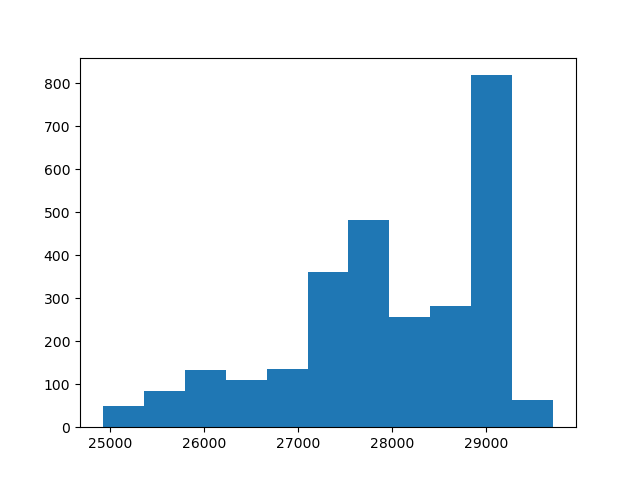

In [14]:
# MODE FROM M
core.grid_glq(nmax = shc_grid, r_at = core.r_cmb)
m_DSS_hist = []
m_DSS_hist_y = []
for i in np.arange(0,core.m_DSS.shape[0]):
    y,binEdges=np.histogram(core.m_DSS[i,:],bins=21)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    m_DSS_hist.append(bincenters)
    m_DSS_hist_y.append(y)
    
m_DSS_hist = np.array(m_DSS_hist).T
m_DSS_hist_y = np.array(m_DSS_hist_y).T

idx_max_y = np.argmax(m_DSS_hist_y,axis=0)

m_DSS_mode = []
for i in np.arange(0,core.m_DSS.shape[0]):
    m_DSS_mode.append(m_DSS_hist[idx_max_y[i],i])
    
m_DSS_mode = np.array(m_DSS_mode)[:,None]

set_nmax = shc_grid
g_DSS_mode, _ = mt_util.sh_expand_glq(m_DSS_mode, core.grid_nmax, core.grid_w_shtools, core.grid_zero, set_nmax, geomag_r_at = core.r_cmb)        
g_DSS_mode = np.array(g_DSS_mode).T

core.g_spec_mode = g_DSS_mode

m_DSS_mode_pred = core.G@m_DSS_mode
m_DSS_mode_res = s_sat.data.reshape(-1,1) - m_DSS_mode_pred

plt.figure()
plt.hist(m_DSS_mode_res,bins=11)
plt.show()

In [15]:
core.grid_glq(nmax = 30, r_at = core.r_cmb)

g_mean, _ = mt_util.sh_expand_glq(np.mean(core.m_DSS,axis=1), core.grid_nmax, core.grid_w_shtools, core.grid_zero, set_nmax, geomag_r_at = core.r_cmb)        
core.g_spec_mean = np.array(g_mean).T.reshape(-1,)

core.ensemble_B(core.g_spec, nmax = 30, r_at = core.r_cmb, grid_type = "glq")
zs_DSS = core.B_ensemble[:,0].copy()
core.m_DSS = zs_DSS.copy()

core.m_DSS_pred = core.G@core.m_DSS
core.m_DSS_res = s_sat.data.reshape(-1,1) - core.m_DSS_pred

m_DSS_pred_mean = core.G@np.mean(core.m_DSS, axis=1).reshape(-1,1)
m_DSS_res_mean = s_sat.data.reshape(-1,1) - m_DSS_pred_mean

<IPython.core.display.Javascript object>


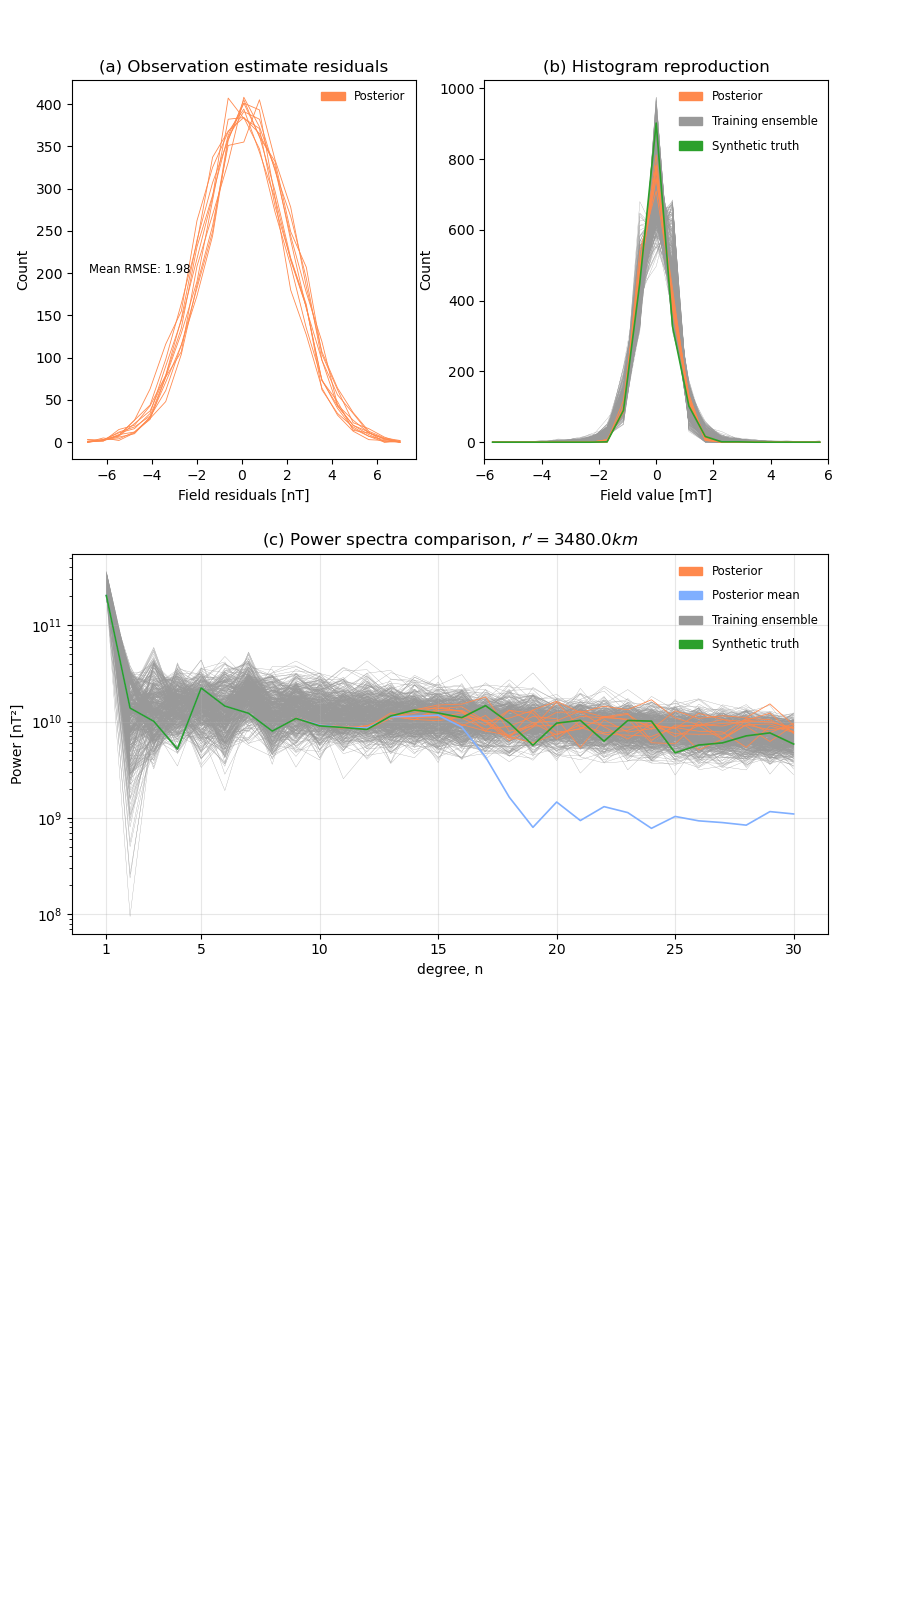

In [16]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)

#truth_obj = s_source

core.grid_glq(nmax = shc_grid, r_at = core.r_cmb)
#m_mode = m_DSS_mode
mt_util.plot_sdssim_reproduce(core, core.m_DSS_res, m_equiv_lsq = None, truth_obj = s_source,
                              lags_use = 1000, spec_r_at = core.r_cmb, spec_show_differences = False,
                              spec_ti_ens = True, lwidth = 0.6, lwidth_div = 3, lwidth_mult = 2,
                              label_fontsize = "small",
                              res_use = True, sv_use = False, unit_field = "[mT]", hist_ti_ens_limit = [-6,6],
                              unit_transform_n_to_m = True, patch_legend = True, ens_prior = True,
                              model_dict = {}, figsize=(9,16), hist_ti_ens = "all", hist_density = False,
                              hist_bins = 21, res_bins = 21, hist_pos_mean = False,
                              left=0.08, bottom=0.12, right=0.92, top=0.95, wspace = 0.2, hspace=0.25,
                              savefig = False, save_string = "case_core_synthetic_sht_Lcond", 
                              save_dpi = 100, save_path = "images/")

In [17]:
core.grid_glq(nmax = 400, r_at = core.r_cmb)
#core.grid_glq(nmax = 30, r_at = core.r_cmb)

set_nmax = shc_grid

core.ensemble_B(core.g_spec, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_eqa = core.B_ensemble[:,0,:].copy()
#zs_eqa = core.m_DSS
#core.g_spec_mean = np.mean(core.g_spec,axis=1)
core.ensemble_B(core.g_spec_mean, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_mean_eqa = core.B_ensemble[:,0].copy()
#zs_mean_eqa = np.mean(core.m_DSS,axis=1)

#core.ensemble_B(core.g_prior[:mt_util.shc_vec_len(set_nmax)], nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
core.ensemble_B(s_sat.g_prior[:mt_util.shc_vec_len(set_nmax)], nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
prior_eqa = core.B_ensemble[:,0].copy()

#core.ensemble_B(core.g_lsq_equiv, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
#lsq_eqa = core.B_ensemble[:,0].copy()

<IPython.core.display.Javascript object>


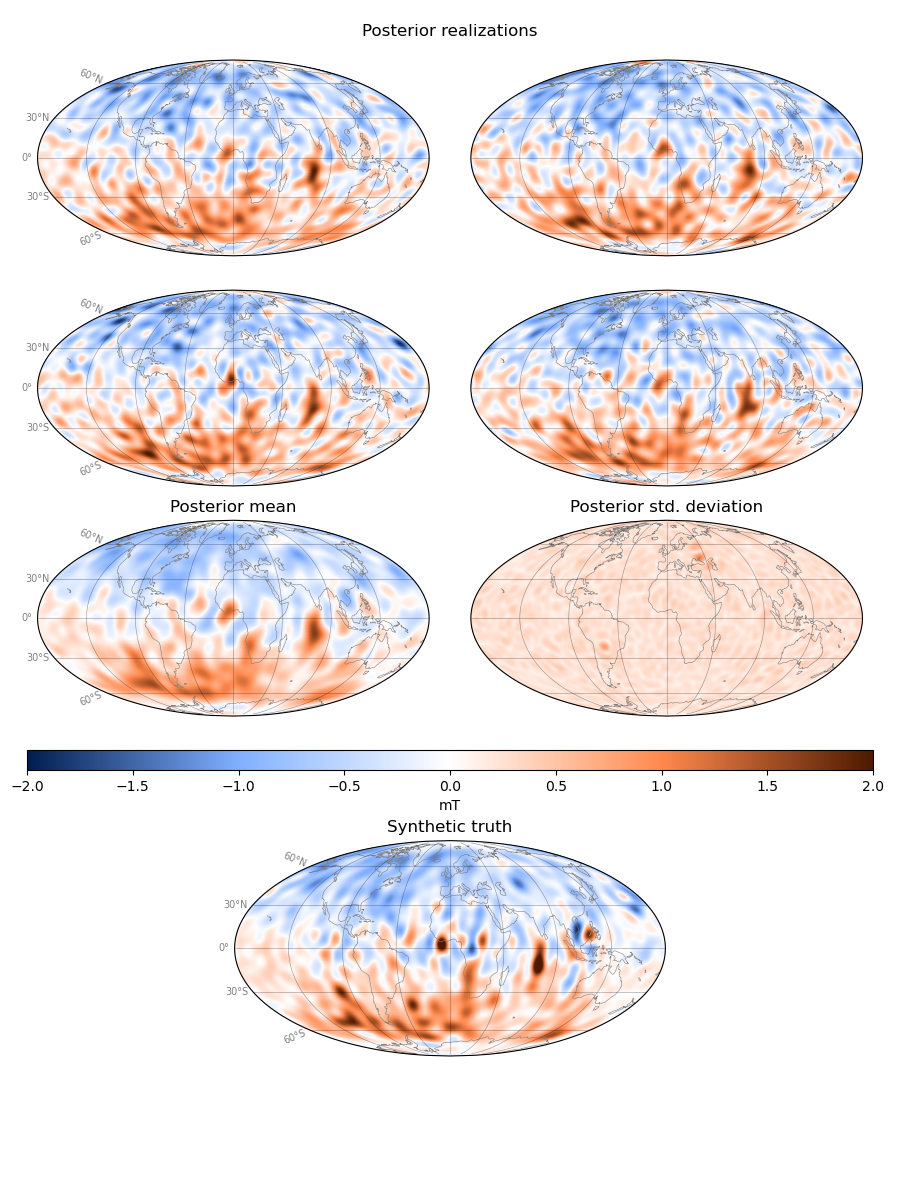

In [18]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)
# ccrs.PlateCarree()
# ccrs.Mollweide()
# ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0)

mt_util.plot_ensemble_map_tiles(core.grid_phi, 90-core.grid_theta, zs_eqa, 
                        field_compare = prior_eqa, field_lsq = None, field_mean = zs_mean_eqa,
                        tile_size_row = 3, tile_size_column = 2, 
                        figsize=(9,12), limit_for_SF = 10**6, point_size = 1, cbar_limit = [-2,2],
                        coast_width = 0.4, coast_color = "grey", unit_transform_n_to_m = True,
                        cbar_h = 0.1, cbar_text = "mT", cbar_text_color = "black",
                        left=0.03, bottom=0.12, right=0.97, top=0.95, wspace = 0.05, hspace=0.25, 
                        savefig = False, save_string = "case_core_synthetic_sht_Lcond", 
                        projection = ccrs.Mollweide(), use_gridlines = True, 
                        gridlines_width = 0.4, gridlines_alpha = 0.4, save_dpi = 100,
                        save_path = "images/")


In [12]:
core.pickle_save_self(nb_name)


Saving job

Job saved and finished


In [24]:
list_coord = np.array([[0,2], [-30,30], [45,-45], [70,-170]])
list_coord[:,0] = 90 - list_coord[:,0]
list_coord[:,1][list_coord[:,1]<0.0] = 360 + list_coord[:,1][list_coord[:,1]<0.0]

m_coord_sph = np.hstack((90 - core.lat.reshape(-1,1), core.lon.reshape(-1,1)))

idx_min = []
for coord in list_coord:
    idx_min.append(np.sum(np.abs(m_coord_sph - coord),axis=1).argmin())
    
print(idx_min)

m_hists_coord = m_coord_sph[idx_min]

m_hists = core.m_DSS[idx_min,:]

[915, 1225, 480, 215]


In [25]:
left=0.08
bottom=0.12
right=0.92
top=0.95
wspace = 0.2
hspace=0.25

color_rgb_zesty_pos = (1.0,  0.5372549019607843,  0.30196078431372547)
color_rgb_zesty_neg = (0.5019607843137255,  0.6862745098039216,  1.0)

In [ ]:
m_hists_scale = m_hists*10**(-6)

tile_size_row = 2
tile_size_column = 2

label_fontsize = 10

fig = plt.figure(figsize=(9,9)) # Initiate figure with constrained layout
# Generate ratio lists
h_ratio = [1]*tile_size_row
w_ratio = [1]*tile_size_column
gs = fig.add_gridspec(tile_size_row, tile_size_column, height_ratios=h_ratio, width_ratios=w_ratio) # Add x-by-y grid

for i in np.arange(0,list_coord.shape[0]):

    ax = fig.add_subplot(gs[i])
    
    y,binEdges=np.histogram(m_hists_scale[i,:],bins=11,density=True)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])    
    ax.plot(bincenters, y, '-', color = color_rgb_zesty_neg, 
            label='{}'.format(str(np.round(m_hists_coord[i,:],decimals=1))).lstrip('[').rstrip(']'),
            linewidth = 1)

    #ax.set_title('test')
    #ax.annotate("test", (0.05, 0.5), xycoords='axes fraction', va='center', fontsize = label_fontsize)
    ax.set_xlabel("Field value [mT]")
    ax.set_ylabel("PDF")
    ax.legend(loc='best', fontsize = label_fontsize)
    

fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

In [13]:
#core.grid_glq(nmax = 256, r_at = core.r_cmb)
#core.grid_glq(nmax = 120, r_at = core.r_cmb)
core.grid_glq(nmax = 400, r_at = core.r_cmb)

set_nmax = shc_grid

core.ensemble_B(core.g_spec, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_eqa = core.B_ensemble[:,0,:].copy()

#core.g_spec_mean = np.mean(core.g_spec,axis=1)
core.ensemble_B(core.g_spec_mean, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_mean_eqa = core.B_ensemble[:,0].copy()

#core.ensemble_B(core.g_prior[:mt_util.shc_vec_len(set_nmax)], nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
core.ensemble_B(s_sat.g_prior[:mt_util.shc_vec_len(set_nmax)], nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
prior_eqa = core.B_ensemble[:,0].copy()

#core.ensemble_B(core.g_lsq_equiv, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
#lsq_eqa = core.B_ensemble[:,0].copy()

In [ ]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)
# ccrs.PlateCarree()
# ccrs.Mollweide()
# ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0)

mt_util.plot_ensemble_map_tiles(core.grid_phi, 90-core.grid_theta, zs_eqa, 
                        field_compare = prior_eqa, field_lsq = None, field_mean = zs_mean_eqa,
                        tile_size_row = 3, tile_size_column = 2, 
                        figsize=(9,12), limit_for_SF = 10**6, point_size = 0.1, cbar_mm_factor = 1, cbar_limit = [-1.6,1.6],
                        coast_width = 0.4, coast_color = "grey", unit_transform_n_to_m = True,
                        cbar_h = 0.1, cbar_text = "mT", cbar_text_color = "black",
                        left=0.03, bottom=0.12, right=0.97, top=0.95, wspace = 0.05, hspace=0.25, 
                        savefig = False, save_string = "case_core_synthetic", 
                        projection = ccrs.Mollweide(), use_gridlines = True, 
                        gridlines_width = 0.4, gridlines_alpha = 0.4, save_dpi = 100)
